<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210704%5D_Helix_NN_(BPN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pure AI (Neural Network model building) - BingHung 20190716                            


*   [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)
*   [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data)




In [1]:
# 載入套件
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 畫圖套件
from sklearn.neural_network import MLPRegressor

In [2]:
# Upload CSV From a local drive
from google.colab import files
uploaded = files.upload()

Saving Helix_NN_20190716_7para.csv to Helix_NN_20190716_7para.csv


In [3]:
''' ################################################### 
# STEP 1    Define dataPath and read CSV
         Split the data into x and y
################################################### '''

# 設定資料路徑
global PARASWITCH
PARASWITCH = 7

if (PARASWITCH == 4):
    # Re,Pr
    df = pd.read_csv('Helix_NN_20190717_4para.csv')
    # 將資料分為 解釋變數X 與 反應變數Y
    x = np.array(df[['k_d', 'Re', 'Pr', 'angle']])
    
else:    
    #Helix velocity, density
    df = pd.read_csv('Helix_NN_20190716_7para.csv')
    # 將資料分為 解釋變數X 與 反應變數Y
    x = np.array(df[['den', 've', 'k', 'vis', 'sp', 'd', 'angle']])
    
xmax = np.amax(x, axis=0)
x = x/xmax 

y = df['h'].values
ymax = np.amax(y, axis=0)
y =y/ymax

In [4]:
''' ########################################################################## 
# STEP 2    The amount of data  = 20, which is small
         For model validation,  leave-one-out (LOOCV) would be recommended 
         Prepare for leave-one-out (LOOCV)                         
############################################################################# '''
# 準備 K-fold 抓取訓練/測試資料的 index
nfold = x.shape[0] # leave-one-out
# 複製好幾個 [0 1 2] index 序列，抓前 x.shape[0] 個就夠了
folds_ordered = np.tile(np.arange(nfold), x.shape[0])[:x.shape[0]]
# 隨機打亂 [0 1 2] index 序列
# 設定 random seed (驗證結果再現性)
np.random.seed(1)
folds = np.random.permutation(folds_ordered)
# 預留空間存放各模型的預測值
kfold_ytest_2 = np.zeros_like(y) # 網路

In [5]:
''' ################################################### 
# STEP 3    Define the scale of h value                
################################################### '''
scale = ymax #8695.88

In [6]:
''' ####################################################################
# STEP 4    Execute leave-one-out (LOOCV) - K-fold Cross Validation               
#################################################################### '''
# 執行 K-fold Cross Validation
for i in range(nfold):
  # 取第 i 次 K-fold 的訓練資料
  x_train = x[(folds != i),:].copy()
  y_train = y[folds != i].copy()
  # 取第 i 次 K-fold 的測試資料
  x_test  = x[(folds == i),:].copy()
  y_test = y[folds == i].copy()

  ''' ####################################################################
    # STEP 5    Define NN-Model, Train the model and Predict the h(from AI)              
    #################################################################### '''
  # 用訓練資料 _train 建網路模型
  ann2 = MLPRegressor(hidden_layer_sizes=(5,4), activation ='tanh', solver = 'lbfgs', max_iter = 10000)
  # 用預測資料 x_test 以網路模型 預測 Y -> y_test 
  ann2.fit(x_train, y_train)
  # 將預測值 y_test 儲存回 kfold_ytest_2 中相對應的位置
  y_ann2 = ann2.predict(x_test)
  kfold_ytest_2[folds == i] = y_ann2 

In [7]:
# K-fold 完成
# 計算 CV 誤差 (RMSE)
''' #########################
# STEP 6   Calculate RMSE             
############################ '''
kfold_rmse_2 = np.sqrt(np.mean((y * scale - kfold_ytest_2 * scale)**2))
print('NN LOOCV RMSE: ' + str(kfold_rmse_2))

#調整h比例
y_p = kfold_ytest_2 * scale
y_a = y * scale

NN LOOCV RMSE: 1112.1762464028013


Text(0, 0.5, 'h (NN-LOOCV)')

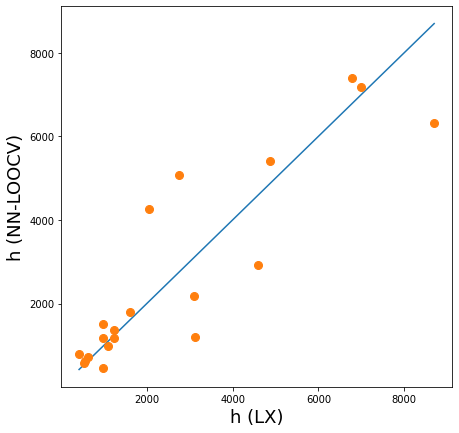

In [8]:
''' ################################################################
# STEP 7 Model Prediction Validation - leave-one-out (LOOCV)                        
################################################################ '''


#繪圖
figLim = [np.array(min(np.min(y_a), np.min(y_p))),
          np.array(max(np.max(y_a), np.max(y_p)))]
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(1,1,1)
ax.plot(np.array(figLim), np.array(figLim))
ax.plot(y_a, y_p, '.', markersize = 16)
ax.set_xlabel('h (LX)', fontsize = 18)
ax.set_ylabel('h (NN-LOOCV)', fontsize = 18)

NN Fitted RMSE: 83.71080868170168


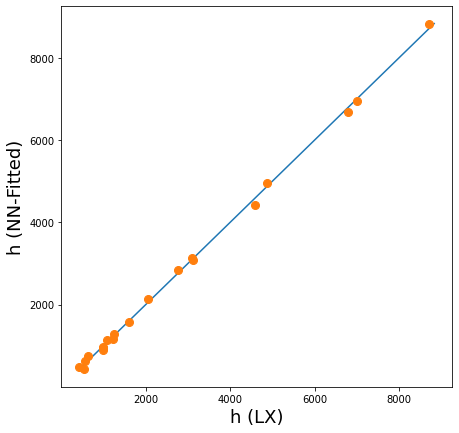

In [9]:
''' ################################################
    # STEP 8  Model Prediction  - Fitted (All In)                        
    ################################################ '''

annf = MLPRegressor(hidden_layer_sizes = (5,4), activation ='tanh', solver = 'lbfgs', max_iter = 10000)
annf.fit(x, y)
y_annf = annf.predict(x)
  
rmse_f = np.sqrt(np.mean((y * scale - y_annf * scale)**2))
print('NN Fitted RMSE: ' + str(rmse_f))

y_p_f = y_annf * scale

#繪圖
figLim = [np.array(min(np.min(y_a), np.min(y_p_f))),
          np.array(max(np.max(y_a), np.max(y_p_f)))]
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(1,1,1)
ax.plot(np.array(figLim), np.array(figLim))
ax.plot(y_a, y_p_f, '.', markersize = 16)
ax.set_xlabel('h (LX)', fontsize = 18)
ax.set_ylabel('h (NN-Fitted)', fontsize = 18)
#
nn_result = pd.DataFrame(np.array([y_a, y_p, y_p_f]).transpose(), 
                          columns = ['h (LX)', 'h (NN-LOOCV)', 'h (NN-Fitted)'])

In [10]:
nn_result

,h (LX),h (NN-LOOCV),h (NN-Fitted)
0,7001.73,7187.448757,6946.466755
1,6776.87,7382.457910,6676.478656
2,8695.88,6319.411196,8826.465068
3,990.20,1511.348779,961.883340
4,541.68,587.026736,442.540384
5,421.42,797.138277,476.372682
6,555.12,616.257326,631.049937
7,986.64,1172.363599,890.091648
8,628.58,728.835679,756.610514
9,1086.32,977.942849,1128.768343
